# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Proyecto Integrador**

### Tecnológico de Monterrey

## Actividad Semana 3

### **Actividad 1. Análisis exploratorio de datos**

Nombres y matrículas de los integrantes del equipo:
* Adrián Alejandro Dávila González - A01039334
* Samuel Emanuel Aguilar García - A00816565

## **Actividades Iniciales**

### Descripción de Contexto

El propósito de este Proyecto Integrador, como se ha mencionado en las descripciones de semanas anteriores, consiste en desarrollar un programa que permita detectar si un componente físico de un sistema de rectificación eléctrica se está comportando de manera correcta o incorrecta en base a mediciones de temperatura capturadas por una cámara térmica durante la operación del equipo.

Para llevar a cabo esto, se tiene considerado hacer uso de dos tipos de modelos de aprendizaje:
*   **Modelo de Aprendizaje Profundo, específicamente un modelo de visión computacional.**
*   **Modelo de Aprendizaje No Supervisado, específicamente un modelo de agrupamiento.**

El uso de las técnicas mencionadas es debido a que se busca realizar la detección de componentes de interés en las imágenes capturadas por el equipo de medición, por lo cual se tiene en cuenta el modelo de visión, y la detección de anomalías en base al comportamiento detectado gracias a las mediciones de temperatura en estos elementos, por lo cual se tiene en cuenta el modelo de agrupamiento.


Al ser un entrenamiento basado en equipo propio, creamos una base de datos de fotografías y datos utilizando una cámara termográfica. Esta cámara nos proporciona distintos tipos de imágenes (como luz normal, térmica y mixta), así como un arreglo de las temperaturas dentro de la imagen. Actualmente, contamos con 382 fotografías (cada una con sus distintos filtros y mapa de temperaturas). Esta base de datos es inicial, ya que buscamos incrementarla a lo largo del proyecto para poder obtener un modelo con mayor precisión. El procesamiento que hemos aplicado a estas variables se describirá más adelante.

### Importado de Librerías a Utilizar

In [1]:
# Montaje de Libreta en Entorno de Google Collaboratory.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importado de Librerías.
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Definición de Ruta en Directorios.
Main_Dir= "/content/drive/MyDrive/Maestría/Sexto Trimestre/Proyecto Integrador/Semana 3"
Temp_Dir = os.path.join(Main_Dir, "Mediciones de Temperatura")
IR_Dir = os.path.join(Main_Dir, "Filtro Infrarrojo")
PIP_Dir = os.path.join(Main_Dir, "Filtro Superpuesto")
VL_Dir = os.path.join(Main_Dir, "Luz Visible")
os.chdir(Main_Dir)

## **Datos para Modelos de Aprendizaje Profundo**

Para obtener los datos del modelo de aprendizaje profundo, se ha generado una base de datos a partir de imágenes obtenidas con una cámara termográfica de la marca **Fluke** con modelo **TiS20+**.

Este conjunto de datos incluye imágenes con diferentes tipos de visualización (luz normal, térmica y mixta), lo que permitirá al modelo aprender a identificar rasgos característicos de diversos componentes dentro de las imágenes.


**Descripción General de los Datos**

Las imágenes capturadas han sido procesadas a través de la plataforma **Roboflow**, una plataforma que nos ha permitido no solo organizar las imágenes y eliminar las de baja calidad, sino también etiquetar cada imagen de manera precisa, asignando componentes a sus respectivas clases.

Además, Roboflow facilita la creación de bases de datos estructuradas listas para ser utilizadas en el entrenamiento de modelos de aprendizaje profundo, permitiendo también generar estadísticas útiles y transformaciones de datos que optimizan el rendimiento del modelo. En etapas futuras, Roboflow podrá ser considerado para el entrenamiento de modelos basados en estas anotaciones.

En total, contamos con 382 imágenes después de eliminar aquellas que estaban borrosas o no cumplían con los criterios de calidad necesarios. A cada imagen se le han asignado etiquetas correspondientes a componentes específicos: Diodo/SCR, Fusible, Snubber y Cables. Estas etiquetas permitirán que el modelo aprenda a identificar correctamente los componentes en nuevas imágenes.

Roboflow nos ha proporcionado estadísticas descriptivas detalladas sobre los datos, entre ellas:

*   Número total de imágenes: **382**
*   Número de anotaciones (etiquetas en las imágenes): **5,837**
*   Tamaño promedio de imagen: **0.31 megapíxeles**
*   Dimensiones: **640x480 píxeles**


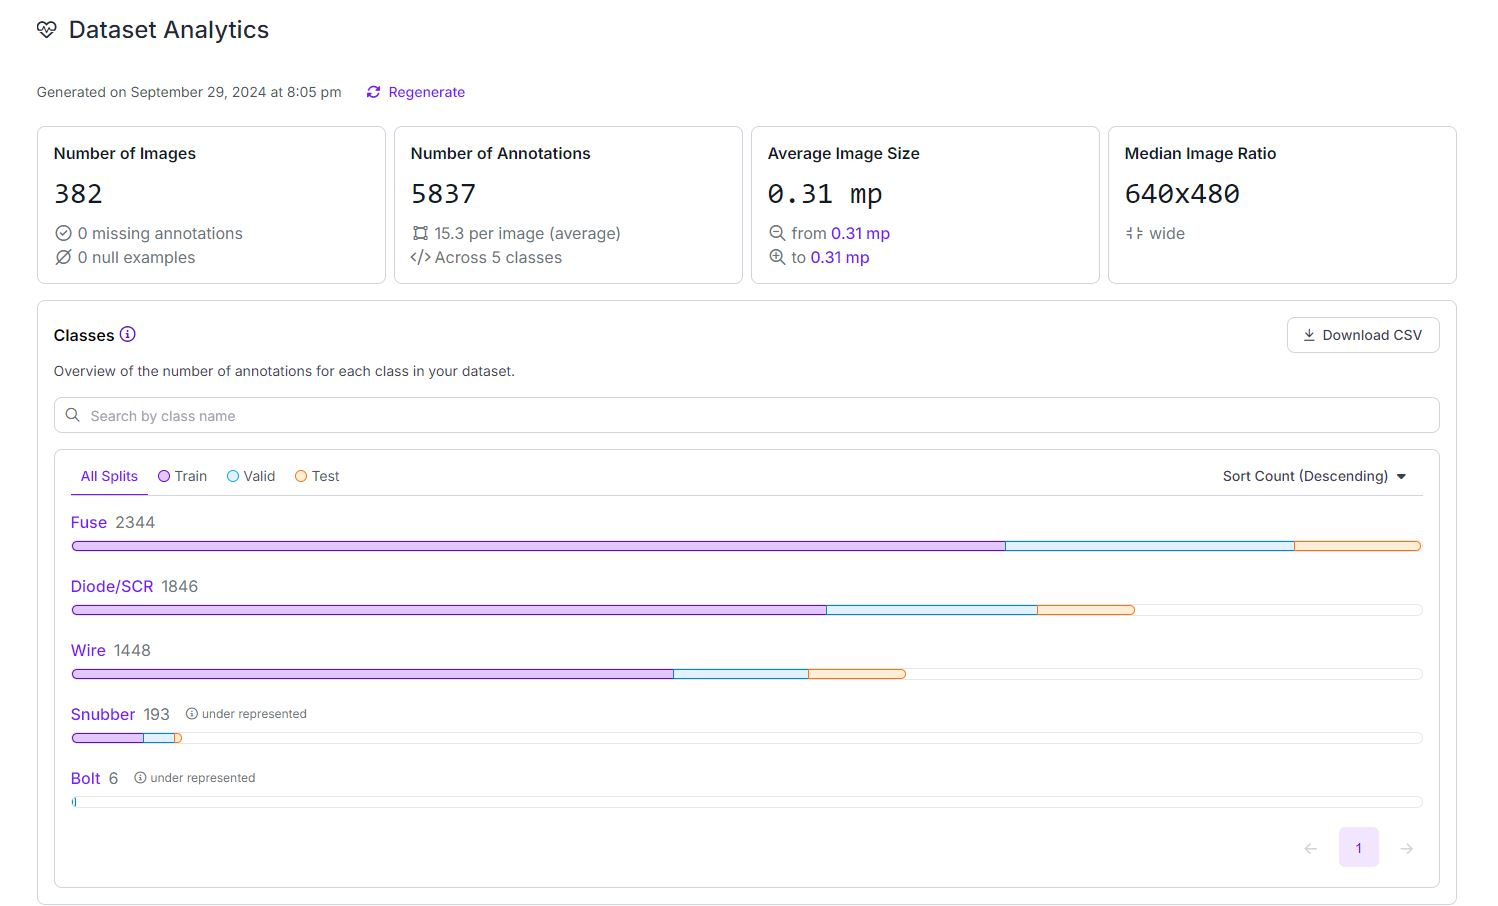

**Variables y Frecuencia de Clases**

En términos de las variables categóricas, los componentes etiquetados (Diodo/SCR, Fusible, Snubber, Cables y Tornillos) representan las clases principales que el modelo deberá aprender a distinguir. Roboflow nos ha permitido contabilizar la frecuencia de las clases y asegurarnos de que cada componente esté debidamente representado en el conjunto de datos, lo que es crucial para evitar un sesgo en el modelo hacia una clase particular.

**Manejo de Valores Faltantes**

Durante el proceso de selección y filtrado de las imágenes, se eliminaron aquellas que no tenían la suficiente calidad o que presentaban datos incompletos. Esto asegura que no haya valores faltantes dentro de las variables de entrada del modelo, además de permitir trabajar con un conjunto de datos limpio y consistente.

Complementario a lo anterior, se decidió descartar a los tornillos en las imágenes debido a que fueron un componente del cual tenemos muy pocas etiquetas. Esto se debió a que, gracias a la resolución de las fotos, no se podía observar claramente la presencia de los tornillos, lo cual no permitía generar un correcto etiquetado.

### Ejemplos de Imágenes con Filtro Infrarrojo

**Filtro Infrarrojo**

A continuación, se muestran algunas imágenes con filtro infrarrojo con las que se cuenta en el dataset.

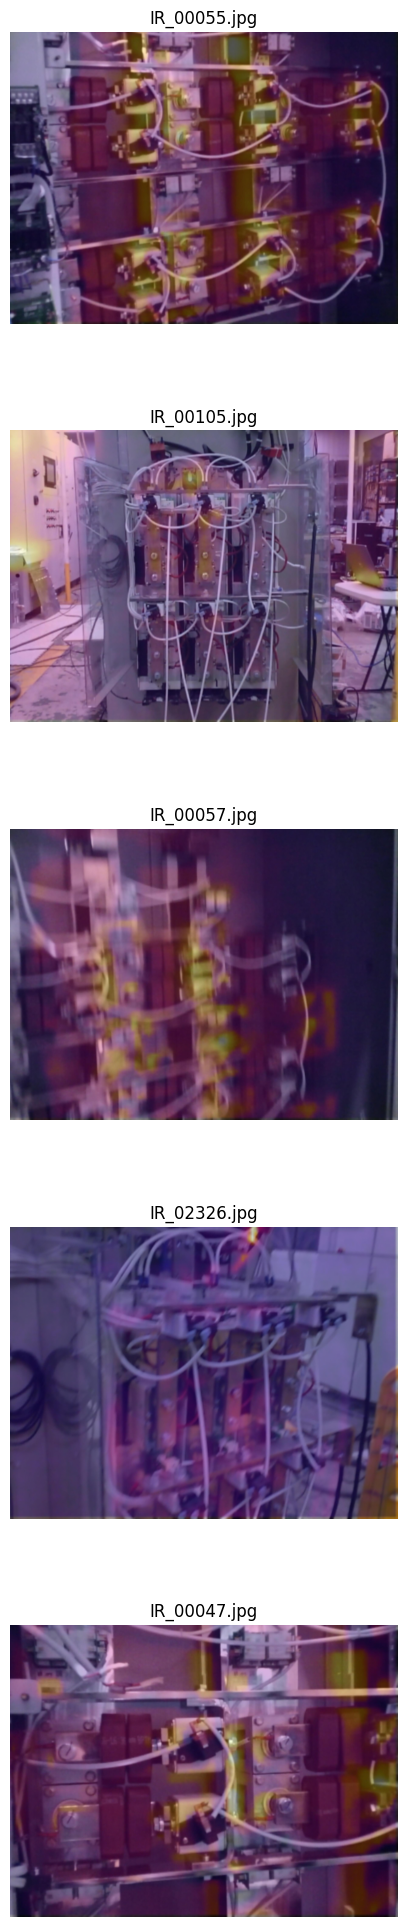

In [4]:
# Impresión de 5 Imágenes de la carpeta "Filtro Infrarrojo"

# Lista con los nombres de las imágenes en la carpeta
image_files = [f for f in os.listdir(IR_Dir) if os.path.isfile(os.path.join(IR_Dir, f))]

# Selección de 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Ploteo de las imágenes seleccionadas verticalmente
plt.figure(figsize=(5, 25))  # Ajuste de tamaño de la figura para imágenes verticales

for i, image_file in enumerate(random_images):
    img = mpimg.imread(os.path.join(IR_Dir, image_file))
    plt.subplot(5, 1, i + 1)  # 5 filas, 1 columna
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

### Ejemplos de Imágenes con Filtro Superpuesto



**Filtro Superpuesto**

A continuación, se muestran algunas imágenes con filtro infrarrojo superpuesto en las imágenes de luz visible con las que se cuenta en el dataset.

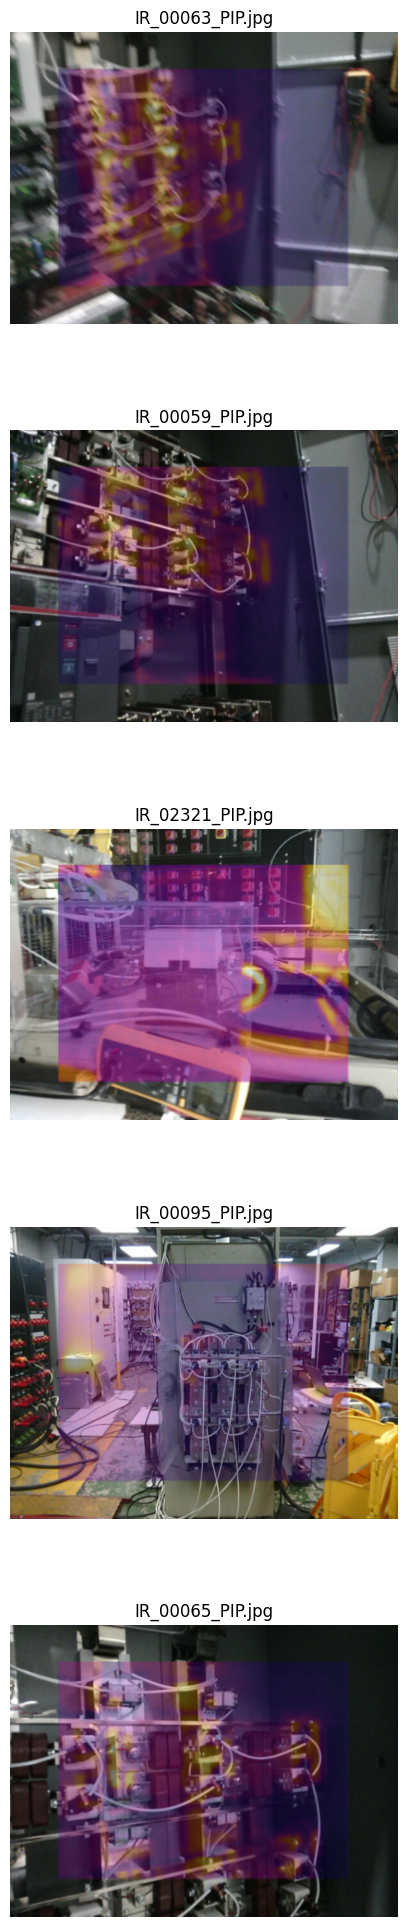

In [5]:
# Impresión de 5 Imágenes de la carpeta "Filtro Superpuesto"

# Lista con los nombres de las imágenes en la carpeta
image_files = [f for f in os.listdir(PIP_Dir) if os.path.isfile(os.path.join(PIP_Dir, f))]

# Selección de 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Ploteo de las imágenes seleccionadas verticalmente
plt.figure(figsize=(5, 25))  # Ajuste de tamaño de la figura para imágenes verticales

for i, image_file in enumerate(random_images):
    img = mpimg.imread(os.path.join(PIP_Dir, image_file))
    plt.subplot(5, 1, i + 1)  # 5 filas, 1 columna
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

### Ejemplos de Imágenes con Luz Visible



**Luz Visible**

A continuación, se muestran algunas imágenes de luz visible con las que se cuenta en el dataset.

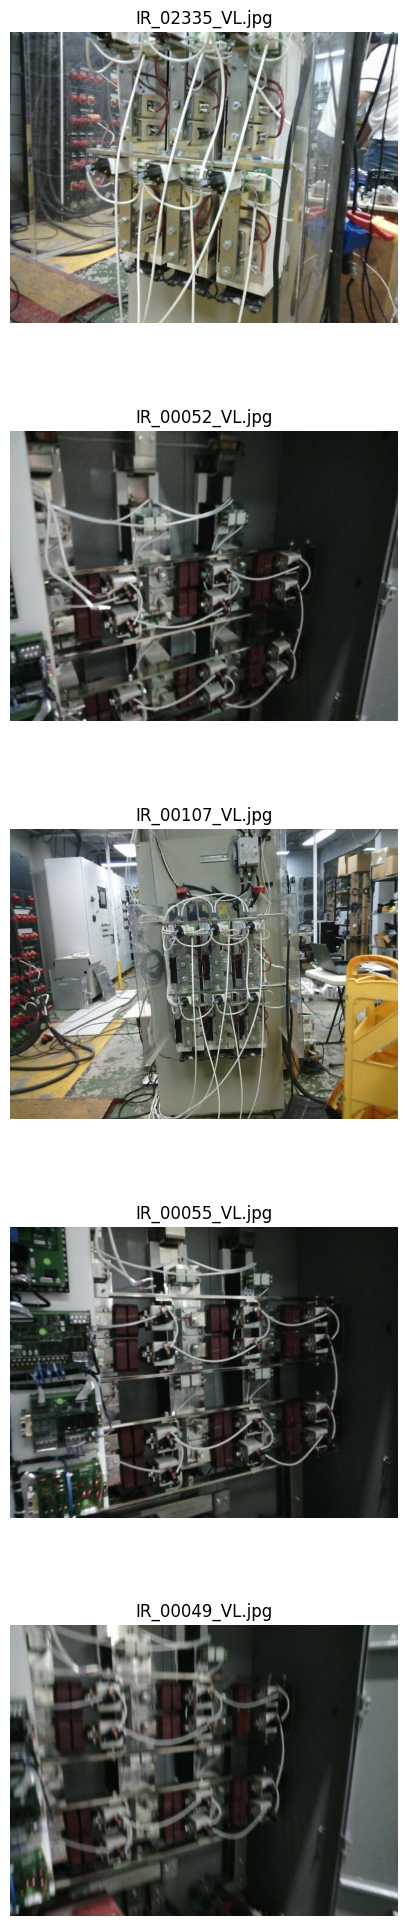

In [6]:
# Impresión de 5 Imágenes de la carpeta "Luz Visible"

# Lista con los nombres de las imágenes en la carpeta
image_files = [f for f in os.listdir(VL_Dir) if os.path.isfile(os.path.join(VL_Dir, f))]

# Selección de 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Ploteo de las imágenes seleccionadas verticalmente
plt.figure(figsize=(5, 25))  # Ajuste de tamaño de la figura para imágenes verticales

for i, image_file in enumerate(random_images):
    img = mpimg.imread(os.path.join(VL_Dir, image_file))
    plt.subplot(5, 1, i + 1)  # 5 filas, 1 columna
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

## **Datos para Modelos de Aprendizaje No Supervisado**

Además de las imágenes previamente mencionadas para el modelo de visión computacional, se cuentan con archivos .csv que contienen las mediciones de temperatura obtenidas por los diversos sensores de la cámara, correspondientes a cada uno de los pixeles de los filtros mostrados en el apartado anterior.

A estos archivos se les generó un primer análisis exploratorio que se muestra a continuación.

### Apertura y Lectura de Archivos

In [7]:
# Generación de dataframe de ejemplo e impresión de algunas filas para observar el formato del archivo
os.chdir(Temp_Dir)
df_examp = pd.read_csv('IR_00046.csv', encoding='utf-16', sep='\t')
df_examp

All temperatures in °C.
0   C:\Users\ADavila\Documents\Fluke Connect\adria...
1   ,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...
2   1,37.3,37.1,36.9,36.4,34.7,33.2,32.5,32.4,32.4...
3   2,36.8,36.7,36.6,36.0,34.5,33.3,32.5,32.4,32.4...
4   3,36.0,36.6,36.6,36.4,34.6,33.4,32.6,32.4,32.5...
..                                                ...
87  86,31.7,31.6,31.6,32.3,34.0,35.6,36.7,37.3,37....
88  87,32.3,32.6,32.6,33.5,34.8,36.4,37.7,38.2,38....
89  88,32.9,33.6,33.9,34.3,35.2,36.6,38.0,38.6,38....
90  89,33.6,34.3,34.6,34.9,35.6,36.8,38.1,38.9,38....
91  90,33.7,34.8,34.9,35.2,36.0,37.1,38.3,38.9,38....

[92 rows x 1 columns]

Como se puede observar, debido al formato en el que se encuentran encodificados los archivos, se debe hacer algo de procesamiento para leerlos de forma correcta y poder generar dataframes relevantes para su análisis.

In [8]:
# Procesamiento de archivos durante la apertura

# Procesos a aplicar a los archivos .csv
def process_df(df):

  # Removido de primeras dos filas debido a que contienen información irrelevante
  df= df.drop([0, 1])

  # Removido de título en el header y separación de datos a través de comas
  df = df['All temperatures in °C.'].str.split(',', expand=True)

  # Conversión a formato numérico de los datos en el dataframe
  df = df.apply(pd.to_numeric, errors='coerce')

  # Revisión por si existen valores "NaN" y removido de los mismos si son encontrados
  if df.isna().any().any():
    df = df.dropna(axis=1)

  # Eliminado de primera columna, debido a que contiene los índices de las filas
  df = df.drop([0], axis=1)

  # Reseteo de los índices en los dataframes
  df.reset_index(drop=True, inplace=True)

  return df

Se definieron un conjunto de procesos que se le realizarán a la información leída para poder obtener los dataframes en la forma en la que se busca.

In [9]:
# Inicialización de una lista vacía para guardar los DataFrames procesados
processed_dataframes = []

In [10]:
# Apertura de los archivos .csv en el folder Medición de Temperaturas

# Iteración a través de los archivos dentro del folder
for filename in os.listdir(Temp_Dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(Temp_Dir, filename)

        # Lectura de cada archivo .csv en un DataFrame
        df = pd.read_csv(file_path, encoding='utf-16', sep='\t')

        # Procesamiento del DataFrame
        processed_df = process_df(df)

        # Añadido del Dataframe a la lista de archivos procesados
        processed_dataframes.append(processed_df)

Una vez que se abrieron y leyeron los archivos, se les aplicó la función con todos los procesos correspondientes para poder interpretarlos como dataframes de manera correcta.

### Comprobación de Características Generales

A la información contenida en los dataframes, se le aplicaron variados procesos y métricas estadísticas, las cuales se muestran a continuación.

In [11]:
# Impresión general de los primeros 5 Dataframes procesados

# Iteración de los primeros 5 Dataframes
for i, df in enumerate(processed_dataframes[:5]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Impresión de un resumen del tipo de los datos del Dataframe
    print(df.info(verbose=False))
    print("\n")

    # Impresión de los primeros 5 renglones del Dataframe
    print(df.head())

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

DataFrame 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Columns: 120 entries, 1 to 120
dtypes: float64(120)
memory usage: 84.5 KB
None


    1     2     3     4     5     6     7     8     9     10   ...   111  \
0  33.2  33.2  33.3  33.3  33.2  33.2  33.2  33.3  33.4  33.3  ...  33.2   
1  33.2  33.3  33.3  33.3  33.3  33.2  33.3  33.4  33.5  33.4  ...  33.3   
2  33.2  33.3  33.3  33.3  33.4  33.3  33.4  33.4  33.5  33.5  ...  33.4   
3  33.2  33.3  33.2  33.3  33.4  33.4  33.3  33.3  33.4  33.4  ...  33.4   
4  33.3  33.3  33.2  33.3  33.3  33.3  33.2  33.2  33.2  33.3  ...  33.3   

    112   113   114   115   116   117   118   119   120  
0  33.2  33.2  33.3  33.2  33.0  32.9  32.7  32.5  32.7  
1  33.2  33.2  33.2  33.3  33.2  33.0  32.9  33.0  33.0  
2  33.3  33.2  33.2  33.3  33.3  33.2  33.2  33.2  33.2  
3  33.2  33.2  33.2  33.3  33.3  33.2  33.2  33.2  33.2  
4  33.2  33.0  33.0  33.2  33.2  33.2  33.0  32.9  33.2  

[5 rows x 120 columns]


Data

Como se puede observar, todos los dataframes tienen el mismo tipo de datos en sus valores, no cuentan con valores perdidos y mantienen la misma relación de tamaño.

In [12]:
# Impresión de la forma y los tipos de dato de los primeros 5 Dataframes procesados

# Iteración de los primeros 5 Dataframes
for i, df in enumerate(processed_dataframes[:5]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Impresión de la forma del Dataframe y el conteo de la cantidad de pixeles por cada dimensión
    shape = df.shape
    print(f"Tamaño del DataFrame: {shape}")
    print(f"Cantidad de Pixeles en Dimensión Horizontal: {shape[1]}" + " px")
    print(f"Cantidad de Pixeles en Dimensión Vertical: {shape[0]}"+ " px\n")

    # Comprobación de los Tipos de Dato dentro del Dataframe
    print(f"Tipo de Dato en Eje X: {df.columns.dtype}")
    print(f"Tipo de Dato en Eje Y: {df.index.dtype}")
    print(f"Tipo de Dato en Eje Z: {df.values.dtype}")

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

DataFrame 1:

Tamaño del DataFrame: (90, 120)
Cantidad de Pixeles en Dimensión Horizontal: 120 px
Cantidad de Pixeles en Dimensión Vertical: 90 px

Tipo de Dato en Eje X: int64
Tipo de Dato en Eje Y: int64
Tipo de Dato en Eje Z: float64


DataFrame 2:

Tamaño del DataFrame: (90, 120)
Cantidad de Pixeles en Dimensión Horizontal: 120 px
Cantidad de Pixeles en Dimensión Vertical: 90 px

Tipo de Dato en Eje X: int64
Tipo de Dato en Eje Y: int64
Tipo de Dato en Eje Z: float64


DataFrame 3:

Tamaño del DataFrame: (90, 120)
Cantidad de Pixeles en Dimensión Horizontal: 120 px
Cantidad de Pixeles en Dimensión Vertical: 90 px

Tipo de Dato en Eje X: int64
Tipo de Dato en Eje Y: int64
Tipo de Dato en Eje Z: float64


DataFrame 4:

Tamaño del DataFrame: (90, 120)
Cantidad de Pixeles en Dimensión Horizontal: 120 px
Cantidad de Pixeles en Dimensión Vertical: 90 px

Tipo de Dato en Eje X: int64
Tipo de Dato en Eje Y: int64
Tipo de Dato en Eje Z: float64


DataFrame 5:

Tamaño del DataFrame: (90, 120

Como se mencionó anteriormente, todos los dataframes contienen datos de tipo numérico y su tamaño corresponde con el tamaño del sensor en la cámara termográfica. En este caso, el dispositivo de medición cuenta con 120 pixeles en la dimensión horizontal y 90 pixeles en la dimensión vertical.

### Análisis Estadístico Univariante

In [13]:
# Impresión de datos estadísticos descriptivos de los primeros 5 Dataframes procesados

# Iteración de los primeros 5 Dataframes
for i, df in enumerate(processed_dataframes[:5]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Impresión de datos estadísticos descriptivos
    print(f"Descripción Estadística de los Datos del DataFrame:\n {df.describe()}"+ "\n")

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

DataFrame 1:

Descripción Estadística de los Datos del DataFrame:
              1          2          3          4          5          6    \
count  90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean   33.185556  33.348889  33.312222  33.340000  33.314444  33.357778   
std     0.148824   0.188575   0.151270   0.149756   0.161844   0.186015   
min    32.700000  32.900000  33.000000  33.000000  33.000000  33.000000   
25%    33.200000  33.200000  33.200000  33.200000  33.200000  33.225000   
50%    33.200000  33.300000  33.300000  33.300000  33.300000  33.300000   
75%    33.300000  33.475000  33.400000  33.400000  33.400000  33.400000   
max    33.600000  33.900000  33.900000  33.900000  33.900000  34.100000   

             7          8          9          10   ...        111        112  \
count  90.000000  90.000000  90.000000  90.000000  ...  90.000000  90.000000   
mean   33.388889  33.415556  33.375556  33.372222  ...  33.036667  32.998889   
std     0.192817 

In [14]:
# Impresión de estadísticas principales de los primeros 5 Dataframes procesados

# Iteración de los primeros 5 Dataframes
for i, df in enumerate(processed_dataframes[:5]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Aplanado del Dataframe a una Serie de 1D y conversión a una serie de Pandas
    flattened_data = df.values.flatten()
    flattened_series = pd.Series(flattened_data)

    # Cálculo del máximo, mínimo, promedio, desviación estándar, asímetria y curtosis de las Temperaturas Medidas
    max_value = df.max().max()  # Valor Máximo en el DataFrame
    min_value = df.min().min()  # Valor Mínimo en el DataFrame
    mean_value = df.mean().mean()  # Valor Promedio en el DataFrame
    std_dev = df.std().mean()  # Desviación Estándar en el DataFrame
    skewness = flattened_series.skew() # Asimetría en el DataFrame
    kurtosis = flattened_series.kurt() # Curtosis en el DataFrame

    # Impresión de Resultados
    print(f"Valor Máximo: {max_value}"+ " °C")
    print(f"Valor Mínimo: {min_value}"+ " °C")
    print(f"Valor Promedio: {mean_value:.2f}"+ " °C")
    print(f"Desviación Estándar: {std_dev:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

DataFrame 1:

Valor Máximo: 42.1 °C
Valor Mínimo: 31.4 °C
Valor Promedio: 34.63 °C
Desviación Estándar: 1.10
Skewness: 1.04
Kurtosis: 0.17


DataFrame 2:

Valor Máximo: 45.9 °C
Valor Mínimo: 32.4 °C
Valor Promedio: 35.95 °C
Desviación Estándar: 1.51
Skewness: 0.92
Kurtosis: 0.34


DataFrame 3:

Valor Máximo: 46.5 °C
Valor Mínimo: 29.1 °C
Valor Promedio: 33.56 °C
Desviación Estándar: 1.49
Skewness: 0.91
Kurtosis: 0.89


DataFrame 4:

Valor Máximo: 48.8 °C
Valor Mínimo: 31.3 °C
Valor Promedio: 36.09 °C
Desviación Estándar: 1.87
Skewness: 1.09
Kurtosis: 1.34


DataFrame 5:

Valor Máximo: 47.3 °C
Valor Mínimo: 32.7 °C
Valor Promedio: 37.06 °C
Desviación Estándar: 1.67
Skewness: 0.77
Kurtosis: 0.31




Por lo que se puede observar en el cálculo de las métricas estadísticas anterior, las asimetrías generales y la curtosis de las mediciones se encuentran en rangos buenos en los que se puede trabajar con los datos.

Además de ello, los registros del punto más caliente, el más frío y la temperatura promedio, serán de una enorme ayuda al momento de buscar trabajar con diferentes agrupamientos de datos.

DataFrame 1:



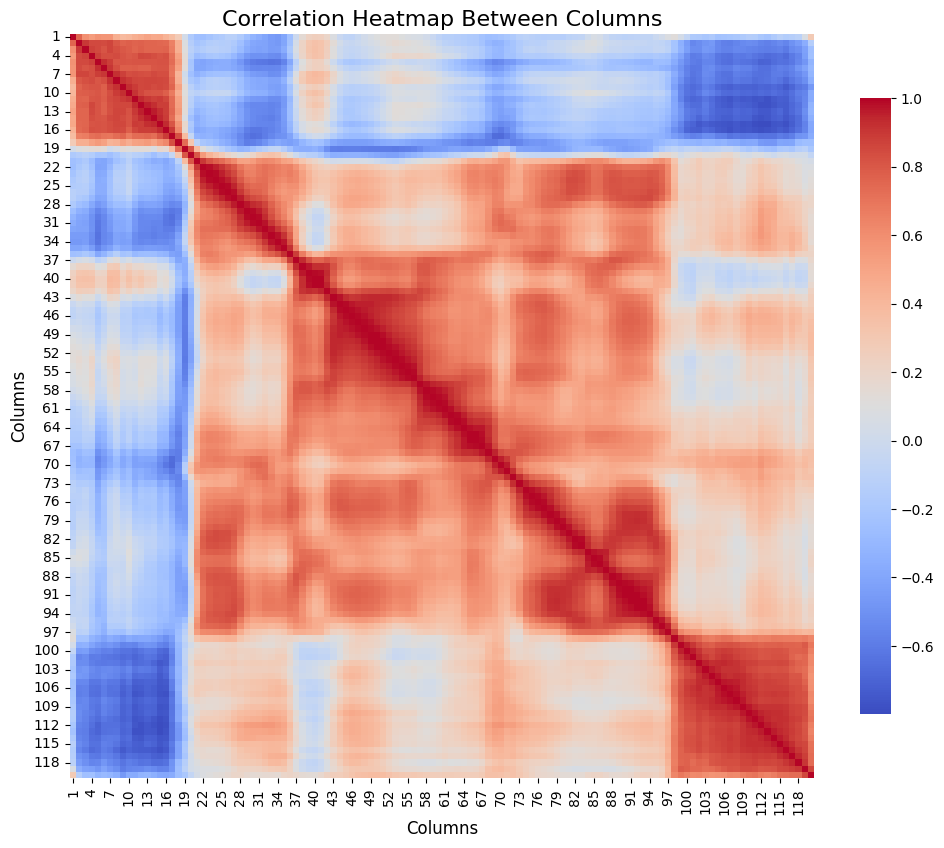

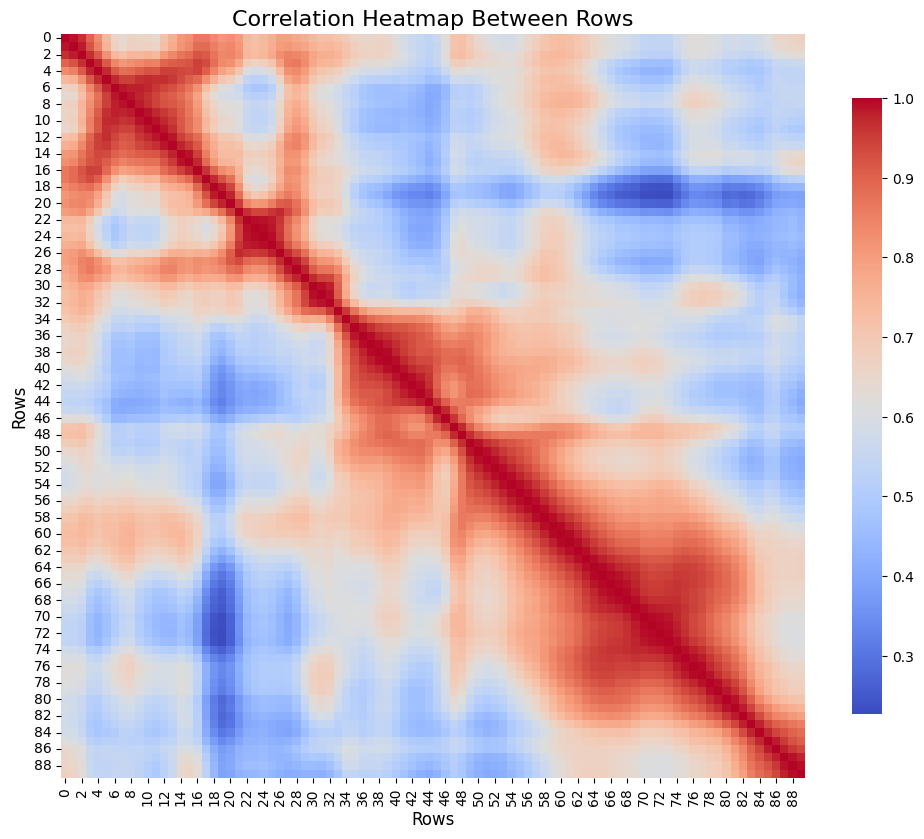



DataFrame 2:



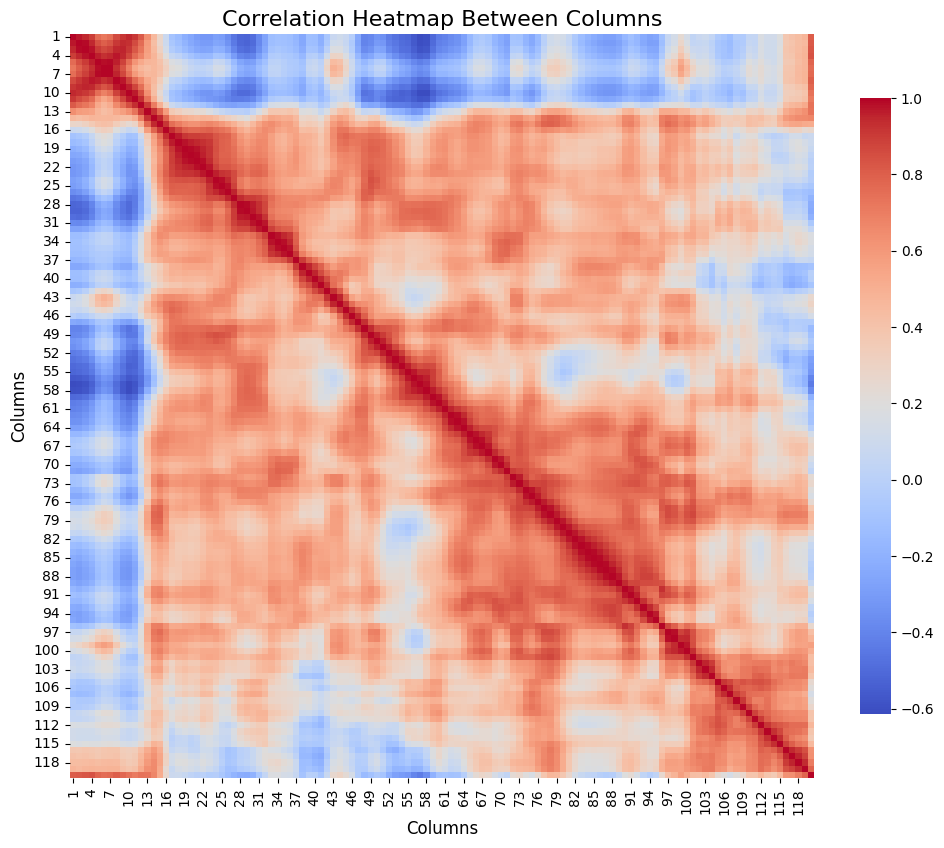

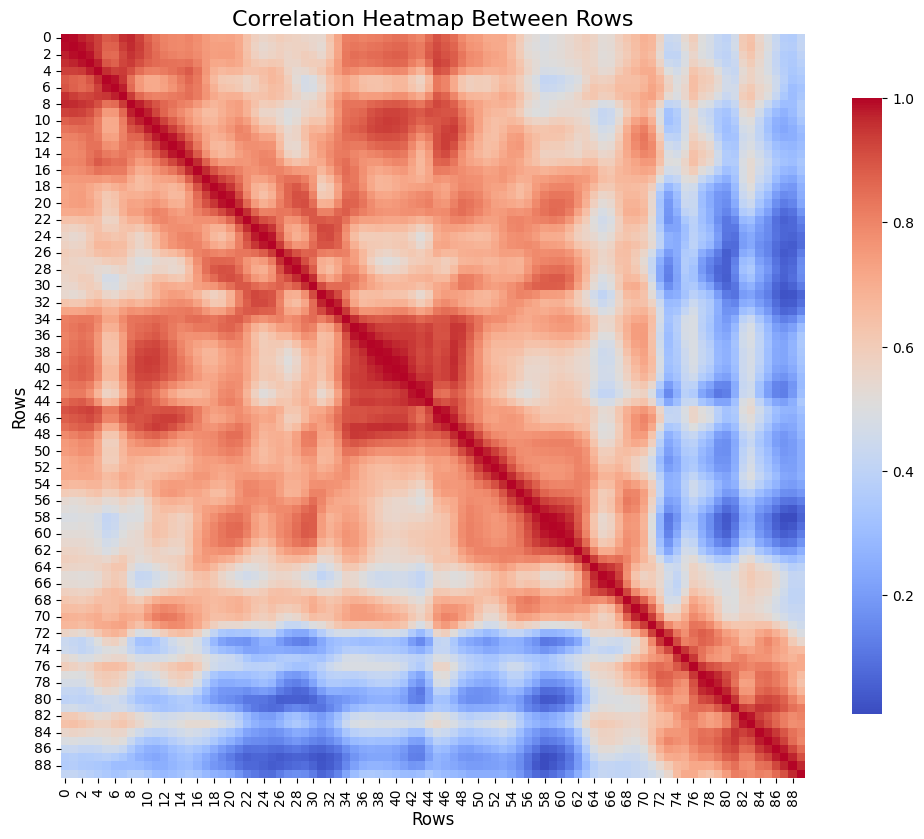

In [15]:
# Impresión de correlaciones entre columnas y filas de los primeros 2 Dataframes procesados

# Iteración de los primeros 2 Dataframes
for i, df in enumerate(processed_dataframes[:2]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Aplanado del arreglo de dos dimensiones en arreglos de una dimensión para filas y columnas
    flattened_rows = df.values.flatten()
    flattened_columns = df.values.T.flatten()

    # Cálculo de la correlación entre columnas
    correlation_columns = df.corr()  # Matriz de Correlaciones para columnas

    # Cálculo de la correlación entre filas
    correlation_rows = df.T.corr()  # Transpuesta para calcular las correlaciones de las filas

    # Figura de matplotlib para las correlaciones entre columnas
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_columns, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap Between Columns', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.show()

    # Figura de matplotlib para las correlaciones entre filas
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_rows, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap Between Rows', fontsize=16)
    plt.xlabel('Rows', fontsize=12)
    plt.ylabel('Rows', fontsize=12)
    plt.show()

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

Como se puede observar en la celda anterior, debido a que los archivos .csv de las mediciones con los que se cuenta solo contienen información de una sola variable (**Temperatura**), es complicado obtener un mapa de correlación que nos pueda entregar información relevante a no ser que se considere una segunda variable como el **Tiempo**.

No obstante, no se cuenta actualmente con mediciones seguidas que permitan llevar a cabo esta comparativa. Esto es algo que se buscará realizar durante los próximos días para obtener un entendimiento con respecto a la variable de tiempo entre dataframes y no entre los contenidos individuales de los mismos.

### Definición de Funciones para Graficado

Debido a que las gráficas de correlación no nos brindan tanta información relevante en estos momentos, se decidió graficar los dataframes para obtener el mapa de contorno y el mapa de superficie de las temperaturas en 2D y 3D, respectivamente.

Ese proceso es mostrado a continuación.

In [16]:
# Inicialización de listas vacías para guardar los valores de los DataFrames que pertenecen a los ejes de las gráficas
X_list = []
Y_list = []
Z_list = []

In [17]:
# Iteración a través de los dataframes procesados
for df in processed_dataframes:
  # Creación de los vectores del grid (X,Y) basado en las columnas e índices del DataFrame, con una conversión de tipos de datos incluida.
  # Esta conversión se considera para poder hacer uso del grid correctamente al intentar graficarlo.
  X, Y = np.meshgrid(df.columns.astype(float), df.index.astype(float))

  # Creación de Z, correspondiente a los valores de temperatura en el DataFrame.
  Z = df.values

  # Añadido de los vectores a la lista de vectores para graficado
  X_list.append(X)
  Y_list.append(Y)
  Z_list.append(Z)

In [18]:
# Comprobación de forma y contenido de los vectores para graficado

# Iteración de los primeros 5 Dataframes
for i, df in enumerate(processed_dataframes[:5]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Impresión de contenido del vector
    print("X Grid:\n", X_list[i])
    print("\n")
    print("Y Grid:\n", Y_list[i])
    print("\n")
    print("Z Values:\n", Z_list[i])

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

DataFrame 1:

X Grid:
 [[  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]
 ...
 [  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]]


Y Grid:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [87. 87. 87. ... 87. 87. 87.]
 [88. 88. 88. ... 88. 88. 88.]
 [89. 89. 89. ... 89. 89. 89.]]


Z Values:
 [[33.2 33.2 33.3 ... 32.7 32.5 32.7]
 [33.2 33.3 33.3 ... 32.9 33.  33. ]
 [33.2 33.3 33.3 ... 33.2 33.2 33.2]
 ...
 [33.3 33.7 33.7 ... 31.7 31.7 32.4]
 [33.3 33.9 33.7 ... 31.9 31.9 32.3]
 [33.2 33.9 33.9 ... 31.9 31.6 31.8]]


DataFrame 2:

X Grid:
 [[  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]
 ...
 [  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]
 [  1.   2.   3. ... 118. 119. 120.]]


Y Grid:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1. 

In [19]:
# Definición de Función para visualizar datos en 2D

def Surf2D(df,X,Y,Z):
    # Creación de un contorno relleno para graficar el Dataframe de dos dimensiones.
    # Se toma en cuenta la escala de colores "Inferno" nuevamente.
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap='inferno')

    # Añadido de una barra de color, que representa la escala de temperatura detectada.
    plt.colorbar()

    # Ajustado de los límites de la barra de colores según los valores mínimos y máximos del Dataframe.
    plt.clim(df.min().min(), df.max().max())

    # Añadido de etiquetas correspondientes a cada eje.
    plt.xlabel('X (Pixels)')
    plt.ylabel('Y (Pixels)')
    plt.title('2D Contour Plot of Temperature')

    # Mostrado del gráfico.
    plt.show()

In [20]:
# Definición de Función para visualizar datos en 3D

def Surf3D(df,X,Y,Z):
    # Generación del gráfico en 3D
    fig = plt.figure(figsize=(14, 10))  # Tamaño arbitrario. Puede ajustarse.
    ax = fig.add_subplot(111, projection='3d')

    # Graficado de la gráfica de superficie, con un mapa de colores ("Inferno") equivalente a la escala de colores "Ironbow" en la que se aprecian
    # los filtros infrarrojos en las imágenes a procesar.
    surf = ax.plot_surface(X, Y, Z, cmap='inferno')

    # Añadido de una barra de color, que representa la escala de temperatura detectada.
    cbar = fig.colorbar(surf)

    # Ajustado de los límites de la barra de colores según los valores mínimos y máximos del Dataframe.
    surf.set_clim(df.min().min(), df.max().max())

    # Añadido de etiquetas correspondientes a cada eje.
    ax.set_xlabel('X (Pixels)')
    ax.set_ylabel('Y (Pixels)')
    ax.set_zlabel('Temperature (°C)')

    # Mostrado del gráfico.
    plt.show()

DataFrame 1:



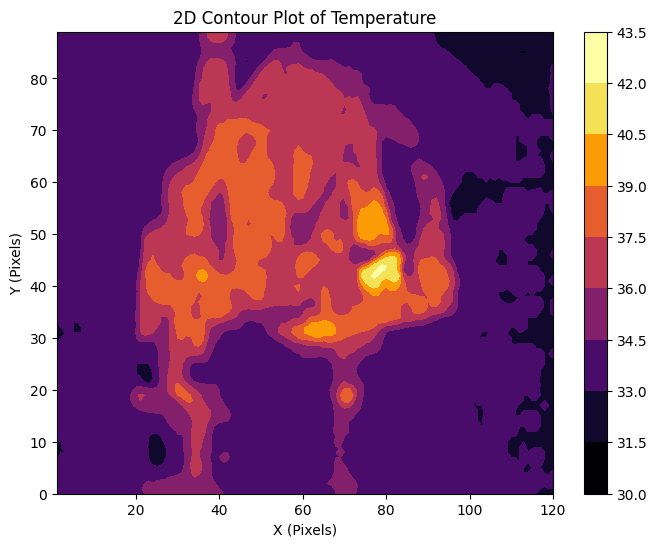

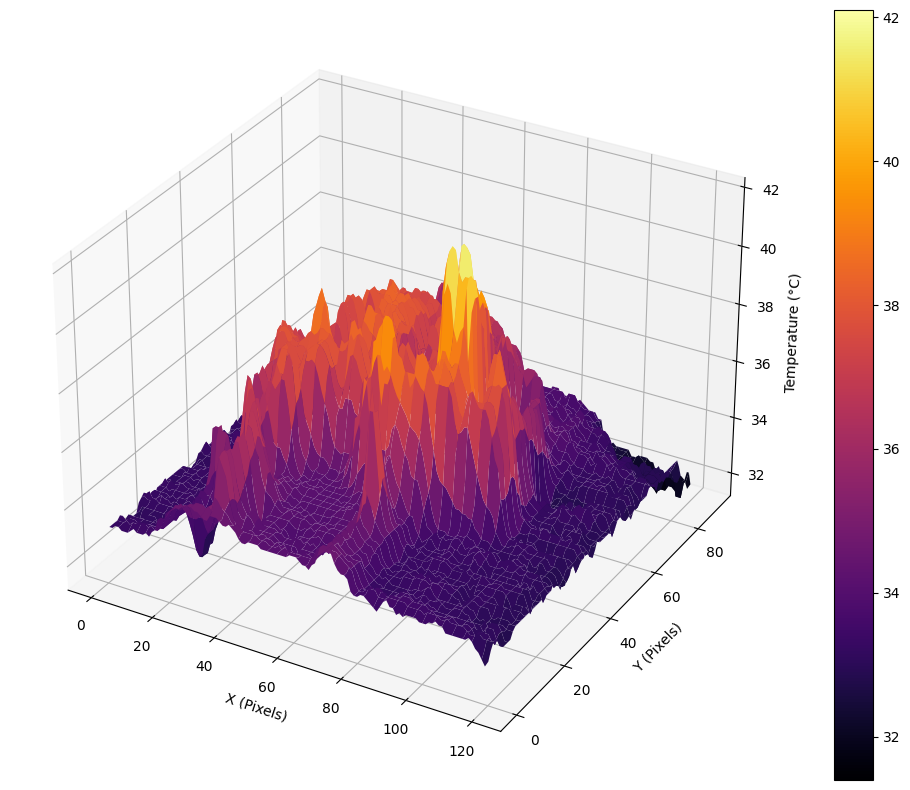



DataFrame 2:



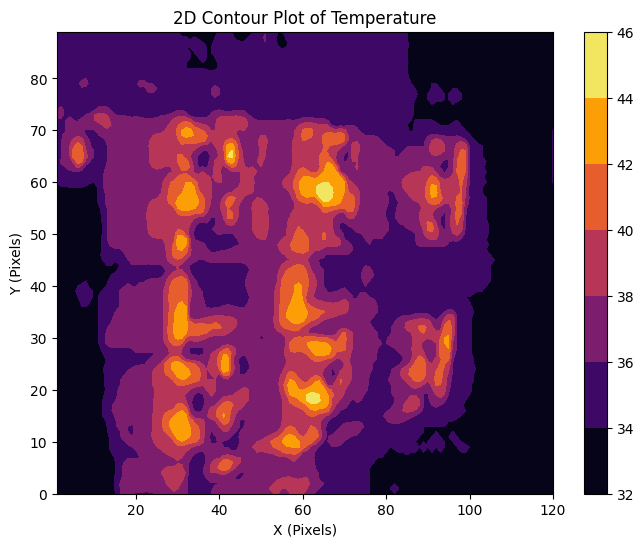

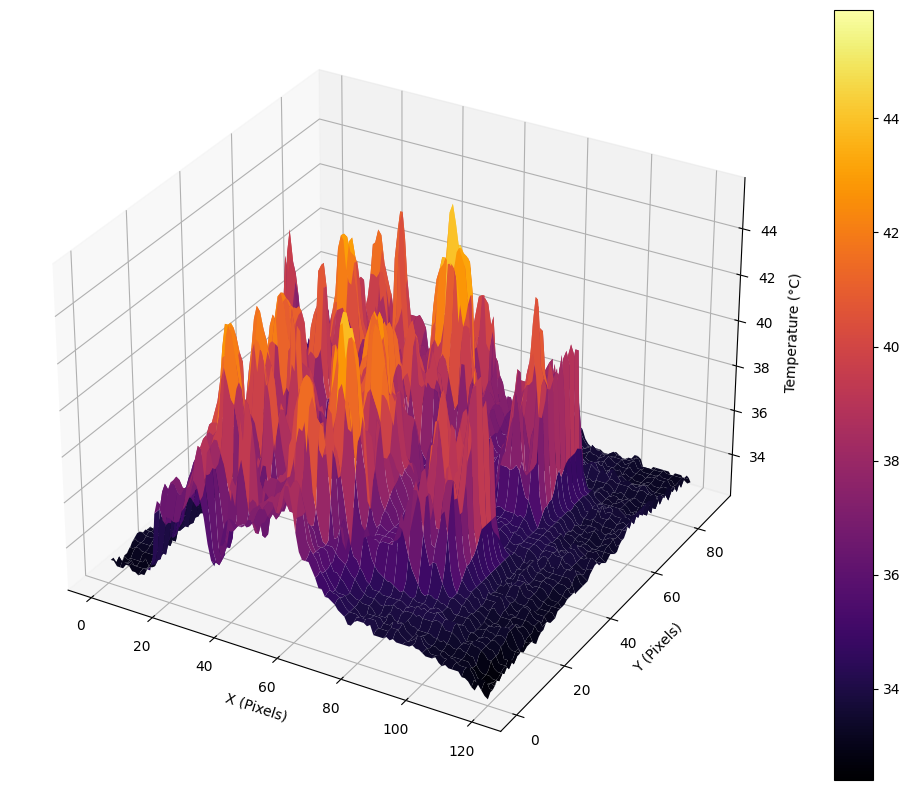



DataFrame 3:



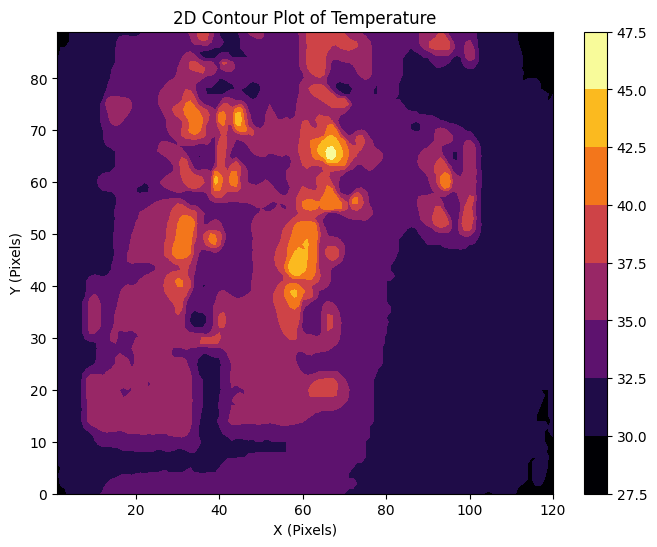

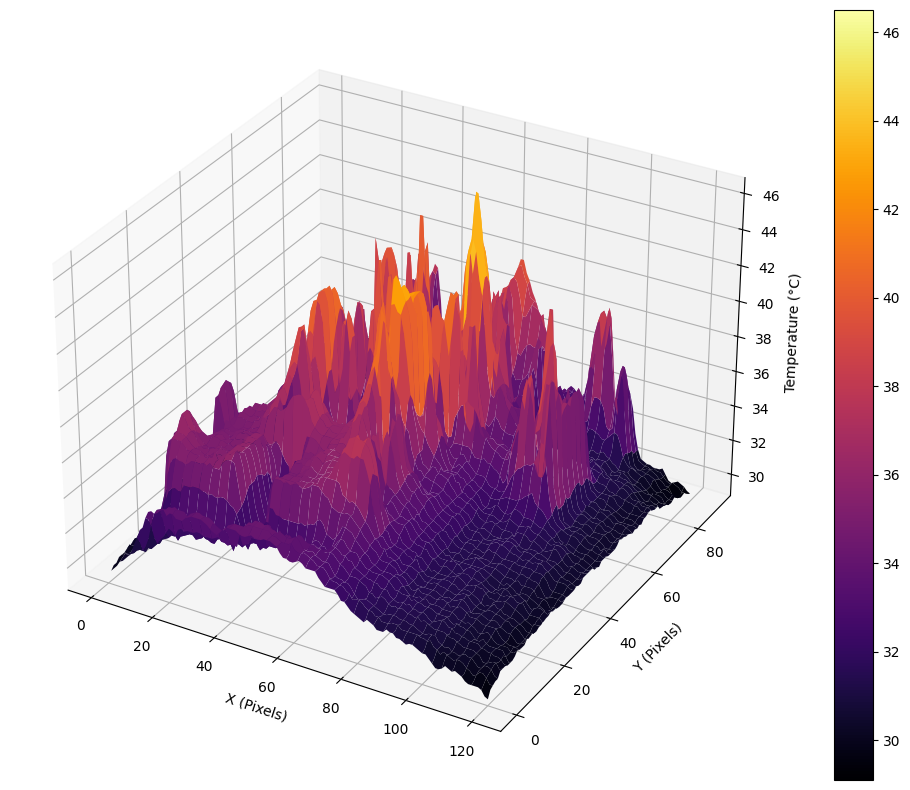



DataFrame 4:



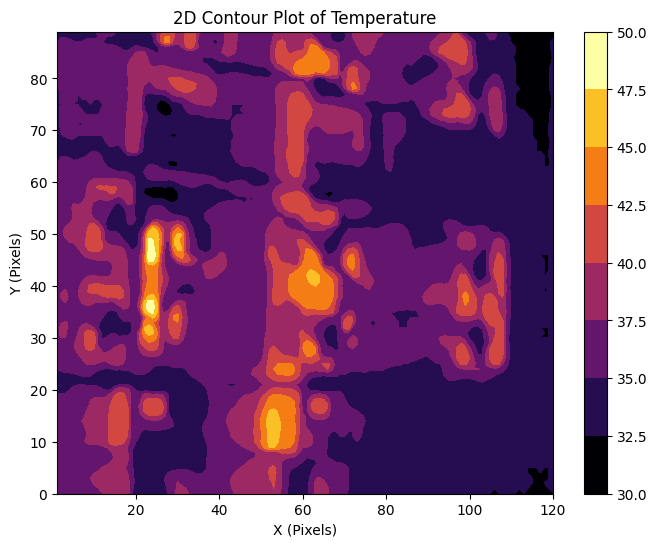

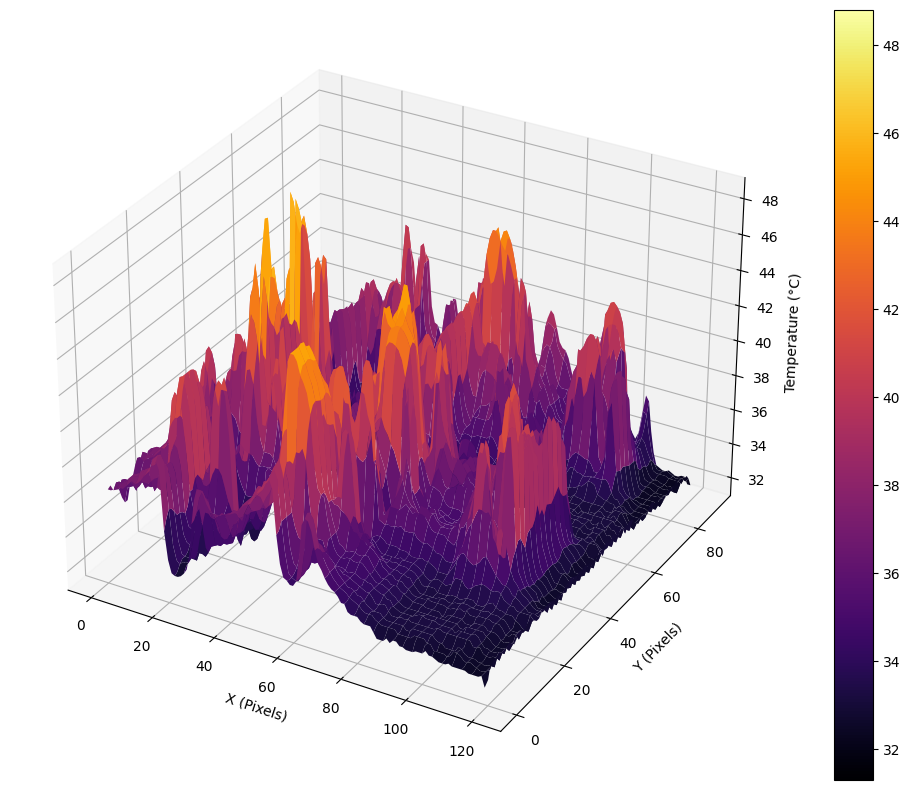



DataFrame 5:



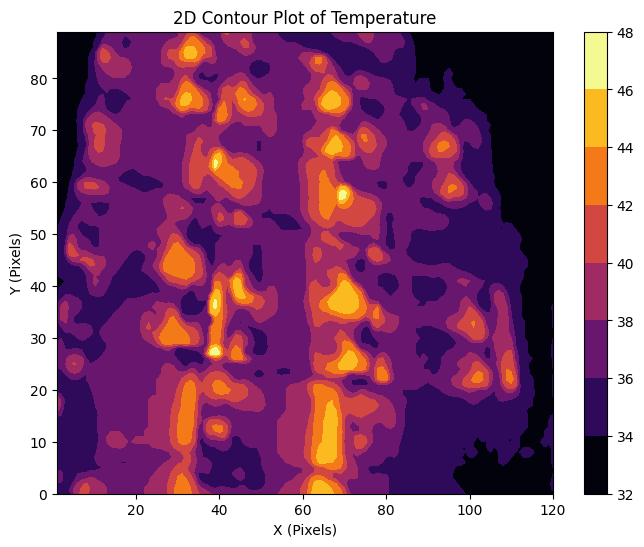

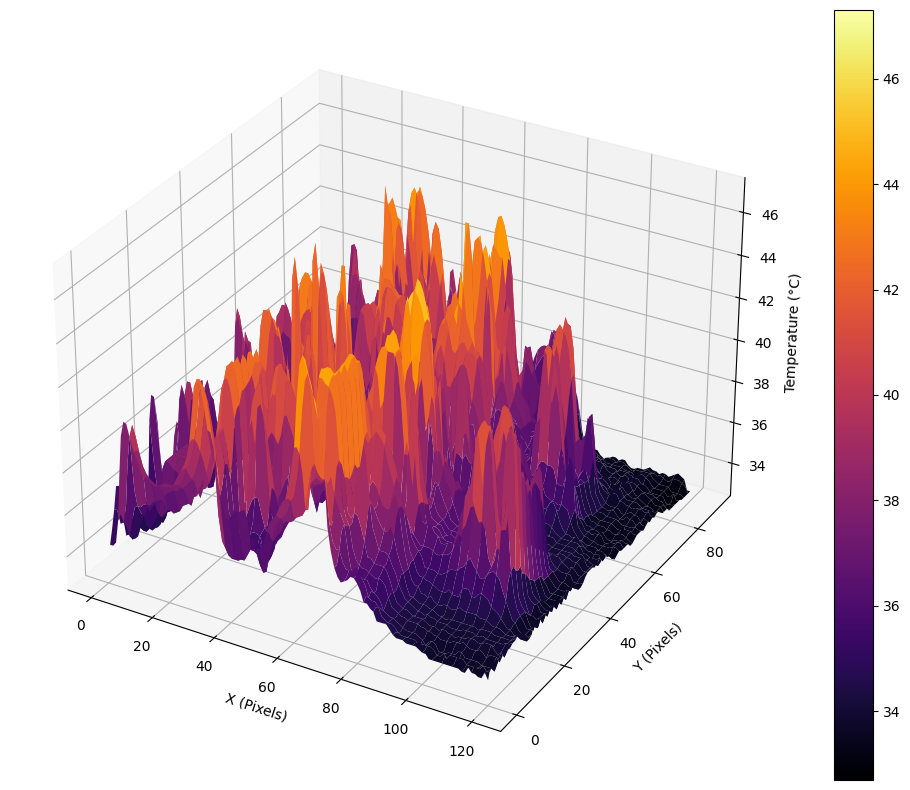

In [21]:
# Impresión de mapas de superficie con las mediciones de temperatura obtenidas

# Iteración de los primeros 5 Dataframes
for i, df in enumerate(processed_dataframes[:5]):

    # Impresión del número de DataFrame
    print(f"DataFrame {i+1}:"+ "\n")

    # Impresión de mapa de contorno en 2D de las temperaturas medidas
    Surf2D(df, X_list[i], Y_list[i], Z_list[i])
    print("\n")

    # Impresión de mapa de superficie en 3D de las temperaturas medidas
    Surf3D(df, X_list[i], Y_list[i], Z_list[i])

    # Separador entre los Dataframes para mejor lectura
    print("\n" + "="*80 + "\n")

Como se puede observar en las visualizaciones de los mapas de contorno y superficie anteriores, éstos brindan una mejor perspectiva con respecto a la distribución y comportamiento de las mediciones de temperatura en cada una de las imágenes.

Gracias a las visualizaciones de los mapas de superficie, se pueden observar los diferentes picos y valores con mayor impacto en la detección, además de algunos grupos de mediciones de temperatura que parecieran formar grupos de pixeles para representar áreas de temperatura.

Esto nos permitirá hacer uso de modelos de agrupación distintos en las fases siguientes para la posible medición de comportamientos de los elementos detectados.

## **Conclusiones**


En conclusión, los datos que hemos recolectado y procesado proporcionan una base sólida para el entrenamiento y ejecución de los módulos de aprendizaje profundo que esperamos desarrollar. No existen valores nulos en nuestro conjunto de datos, ya que las imágenes incluyen la información completa de los píxeles y los archivos CSV contienen todos los valores de temperatura. Además, al realizar el proceso de selección y etiquetado manual de las imágenes, se pudo eliminar aquellas que estaban borrosas, asegurándonos de contar con un dataset inicial limpio y confiable.

El uso de Roboflow fue de gran utilidad, especialmente en situaciones donde no se dispone de una base de datos pre-armada o etiquetada. Si bien el proceso de etiquetado fue algo tedioso, resultó sencillo gracias a las herramientas que la plataforma ofrece, lo cual facilitó la estructuración de nuestro conjunto de datos para el entrenamiento del modelo.

Además de esto, el análisis que se ha podido obtener con relación a los archivos que contienen las mediciones de temperatura ha servido para poder brindarnos un mejor enfoque con respecto a las actividades venideras. Es decir, gracias a la visualización que se ha generado, la selección de posibles modelos para detección de comportamientos en base a agrupamientos se ha reducido. Esto permitirá que las fases de selección de modelado, entrenamiento, validación y pruebas sean mucho más sencillas de llevar a cabo.

Finalmente, nuestro objetivo es aumentar el volumen de datos en el futuro, integrando más imágenes y anotaciones, lo cual nos permitirá obtener un entrenamiento más robusto y confiable. Esto con expectativas de mejorar la precisión del modelo en la identificación de los componentes dentro de las imágenes, además de la detección de comportamientos en base a las temperaturas observadas.